In [64]:
# Import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# To read in the data
df = pd.read_csv(r'C:\Users\igieo\Desktop\DA Trains\DataPortfolioProject\Python_Cleaning-Movies\movies.csv')


In [65]:
# Checking the data

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [36]:
#Check data_types
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [43]:
#Checking for missing data with a for loop.

for col in df.columns:
    missing_data_pct = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(missing_data_pct *100)
                           ))
    

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [66]:
#Changing Data type of the columns with null values
# NaN becomes  <NA>

df["budget"] = pd.to_numeric(df["budget"], errors='coerce').astype('Int64')
df["gross"] = pd.to_numeric(df["gross"], errors='coerce').astype('Int64')

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        Int64
gross         Int64
company      object
runtime     float64
dtype: object


In [67]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


<AxesSubplot:>

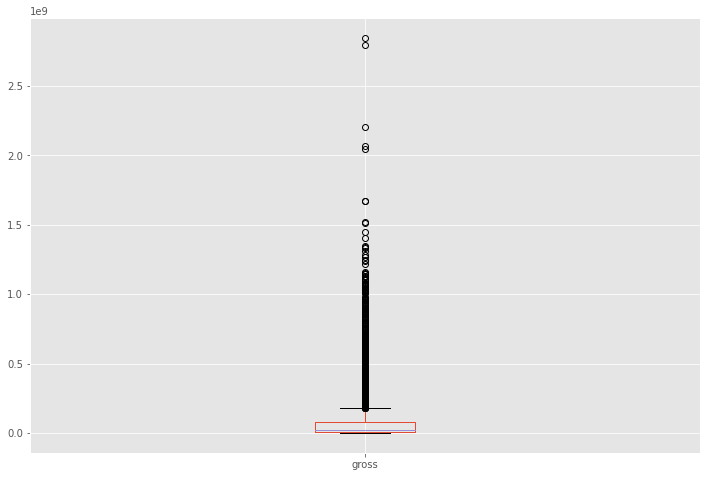

In [54]:
#Check for outliers... Finding a few!
df.boxplot(column=['gross'])

In [118]:
#Create a new column uing the releease date to make a new date
import re
 
df['Year_released'] = df.released.str.extract(r',\s*([^\.]*)\s*\(', expand=False)
    
df['Year_released']



0       1980 
1       1980 
2       1980 
3       1980 
4       1980 
        ...  
7663    2020 
7664    2020 
7665    2020 
7666    2020 
7667    2020 
Name: Year_released, Length: 7668, dtype: object

In [144]:
#Compare the 2 years columns to check for inconsistence
#We first need to change the new column into int, as the year column

df["Year_released"] = pd.to_numeric(df["Year_released"], errors='coerce').astype('Int64')
print(df.dtypes)
#Create a bolean variable that will be true if there are differences between the 2 years columns
df['year_diff']= (df['year'] != df['Year_released'])

#Finding the years that are different
print(df['year_diff'].value_counts()[True])

year_is_diff =  df[df['year_diff'] == True] 

print("data with diiferent years :\n", year_is_diff)
year_is_diff.head()

name              object
rating            object
genre             object
year               int64
released          object
score            float64
votes            float64
director          object
writer            object
star              object
country           object
budget             Int64
gross              Int64
company           object
runtime          float64
Year_released      Int64
year_diff        boolean
dtype: object
1297
data with diiferent years :
                                   name     rating      genre  year  \
8                          Superman II         PG     Action  1980   
11              The Gods Must Be Crazy         PG  Adventure  1980   
21                       Heaven's Gate          R  Adventure  1980   
33    Cattle Annie and Little Britches         PG      Drama  1980   
40            The Watcher in the Woods         PG     Family  1980   
...                                ...        ...        ...   ...   
7525               Weathering with Yo

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_released,year_diff
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981,True
11,The Gods Must Be Crazy,PG,Adventure,1980,"October 26, 1984 (United States)",7.3,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000,30031783,C.A.T. Films,109.0,1984,True
21,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.8,14000.0,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000,3484523,Partisan Productions,219.0,1981,True
33,Cattle Annie and Little Britches,PG,Drama,1980,"April 24, 1981 (United States)",6.1,604.0,Lamont Johnson,David Eyre,Scott Glenn,United States,5100000,534816,Cattle Annie Productions,97.0,1981,True
40,The Watcher in the Woods,PG,Family,1980,"October 9, 1981 (United States)",6.3,5700.0,John Hough,Brian Clemens,Bette Davis,United States,<NA>,5000000,Walt Disney Productions,84.0,1981,True


In [153]:
#Counting the NAs in gross revenue and bugget

print("NAs in gross revenue :\n",df['gross'].isna().sum())
print("NAs in budget revenue :\n",df['budget'].isna().sum())


NAs in gross revenue :
 189
NAs in budget revenue :
 2171


In [154]:
#Order films by gross revenue - Seeing all the data
df.sort_values(by=['gross'], inplace = False, ascending = False)
pd.set_option('display.max_rows', 100)

In [173]:
#fill the NAs with the mean value
mean_gross = df['gross'].mean()
mean_budget = df['budget'].mean()

#Change data type to match int64
mean_gross = mean_gross.astype(np.int64)
mean_budget = mean_budget.astype(np.int64)

#Checking the new values are integrer
print(mean_gross.round())
print(mean_budget.round())

#Then filling the NAs with the means
df['gross'].fillna(value=mean_gross, inplace=True)
df['budget'].fillna(value=mean_budget, inplace=True)

#Checking if it worked

print("NAs in gross revenue :\n",df['gross'].isna().sum())
print("NAs in budget revenue :\n",df['budget'].isna().sum())


78500541
35589876
NAs in gross revenue :
 0
NAs in budget revenue :
 0


In [248]:
#Dropping duplicates
df
df = df.drop_duplicates()
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_released
0,6587,6,6,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1980
1,5573,6,1,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1980
2,5142,4,0,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1980
3,286,4,4,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1980
4,1027,6,4,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1980


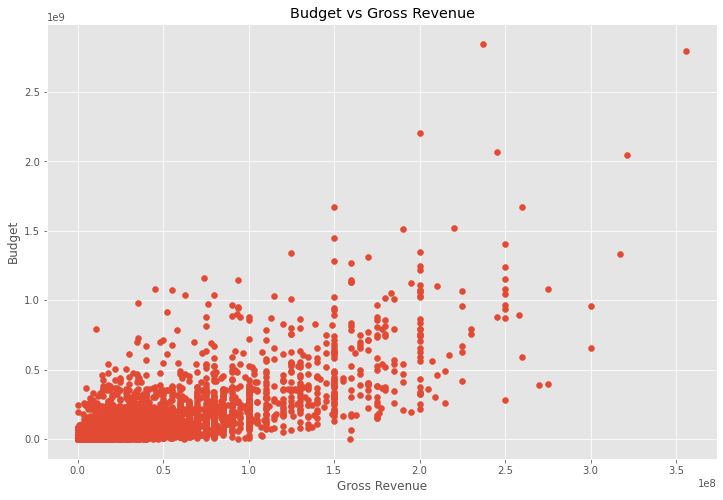

In [190]:
#scatter ploy to look at the budget and gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Budget')

plt.show()


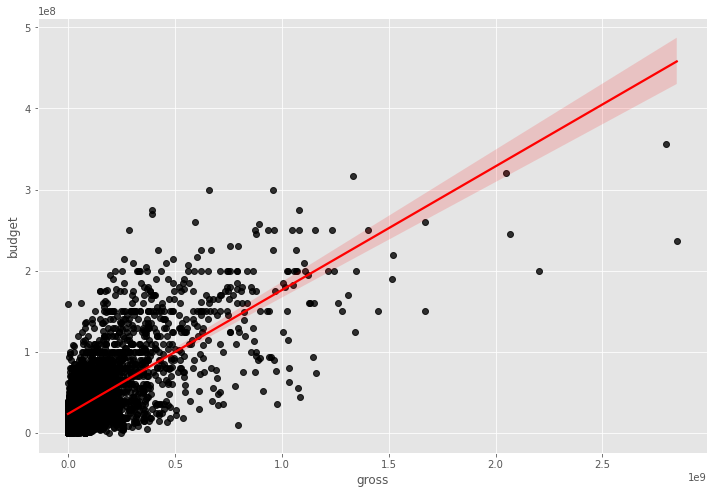

In [221]:
#Plotting with the seaborn for a different view 
#- Needed to change the values back to float
 
df['gross'] = df['gross'].astype('float64')
df['budget'] = df['budget'].astype('float64')    

sns.regplot(x='gross', y='budget', data=df,
scatter_kws={"color": "black"}, line_kws={"color": "red"},dropna = True)

plt.show()

In [222]:
# Correlation 
# Starting with a Correllation Matrix between all numeric columns
#Decided to drop the Initial year column before doing the correlation
del df['year']
del df['year_diff']
df.corr(method ='spearman')

#Note: the correlation between the variables is affected by the filling I did earlier. 
#If I had removed(instead of feeling) the rows with NAs, qurely the values would be  different. 

KeyError: 'year'

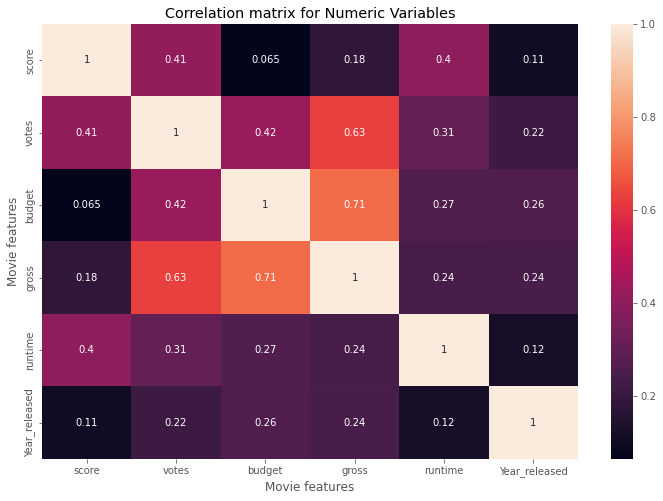

In [214]:
#Visualize the matrix 

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Variables")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

#From the heatmap, it is clear that the gross revenue is correlated  with the budget and the votes

In [219]:
#Changing the objects to category, to apply analysis
df_numeric = df

for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype == 'object'):
        df_numeric[col_name]= df_numeric[col_name].astype('category')
        df_numeric[col_name] = df_numeric[col_name].cat.codes
        
df_numeric

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_released
0,6587,6,6,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1980
1,5573,6,1,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1980
2,5142,4,0,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1980
3,286,4,4,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1980
4,1027,6,4,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2964,3.1,18.0,1500,2289,2421,55,7000.0,78500541.0,-1,90.0,2020
7664,1678,-1,4,1107,4.7,36.0,774,2614,1886,55,35589876.0,78500541.0,539,90.0,2020
7665,4717,-1,6,193,5.7,29.0,2061,2683,2040,55,58750.0,78500541.0,941,NaN,2020
7666,2843,-1,6,2817,NaN,NaN,1184,1824,450,55,15000.0,78500541.0,-1,120.0,2020


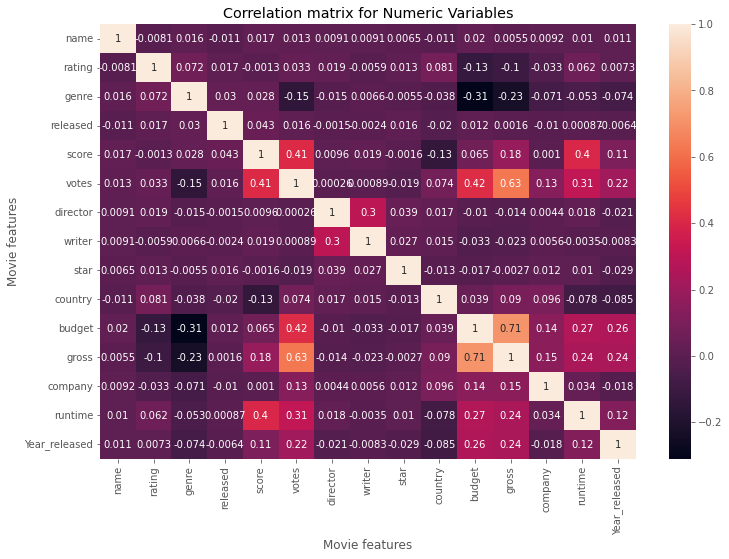

In [228]:
#Visualize the matrix-heatmap for the numeric datafram

correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Variables")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

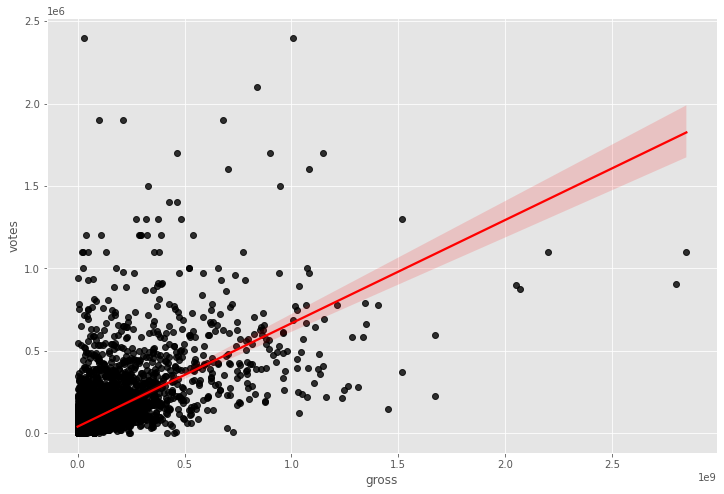

In [225]:
#See the relationship btw gross and votes

sns.regplot(x='gross', y='votes', data=df,
scatter_kws={"color": "black"}, line_kws={"color": "red"},dropna = True)

plt.show()

In [247]:
#We can also filter out the variables that are really correlated
Corr_paired = correlation_matrix.unstack()
#Sort

Corr_paired = Corr_paired.sort_values()

#To be able to view the whole dataset
pd.set_option('display.max_rows', None)
pd.set_option('display.max_Columns', None)
 
print("Pisitively Correlated :\n",Corr_paired[Corr_paired.between(0.4,0.9999)])
print("Negatively Correlated :\n",Corr_paired[Corr_paired.between(-0.3,-0.9999)])

#There  are only positively correlated variables: votes, score, budget, gross revenue... Whch makes sense


Pisitively Correlated :
 votes   score     0.409182
score   votes     0.409182
votes   budget    0.421090
budget  votes     0.421090
votes   gross     0.628713
gross   votes     0.628713
budget  gross     0.711270
gross   budget    0.711270
dtype: float64
Negatively Correlated :
 Series([], dtype: float64)
